## Лабораторна робота 6

Створити програму, яка:
1. а) Зчитує заданий набір даних, виконує попередню обробку, розбиває
дані на навчальні на тестові. Виконує аналіз настроїв за допомогою
наївного баєсівського класифікатора. Виводить матрицю невідповідностей та точність моделі.
б) Використовує один з готових лексиконів, наприклад Textblob, для
аналізу оцінки настроїв. Також розраховує матрицю невідповідностей, та
точність моделі.
в) Обирає три випадкові записи та виводить результати оцінки їх настрою
за пунктами а) і б).

2. Виконує завдання відповідно до варіанту засобами бібліотеки spaCy.
а) Знайти та вивести стоп-слова, які присутні у тексті. б) Знайти та вивести всі іменники, які присутні у тексті. в) Знайти та вивести числа і організації, які присутні у тексті.


##### 1. Аналіз настроїв за допомогою наївного баєсівського класифікатора

а) Аналіз настроїв за допомогою наївного баєсівського класифікатора

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
from textblob import TextBlob

In [2]:
 # Зчитування даних з файлу
data = pd.read_csv("twitter1.csv", header=None, names=["ID", "App", "Sentiment", "Text"])

In [3]:
# Дослідимо дані
data.head()

,ID,App,Sentiment,Text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [4]:
data.tail()

,ID,App,Sentiment,Text
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...
74681,9200,Nvidia,Positive,Just like the windows partition of my Mac is l...


In [5]:
data['Sentiment'].value_counts()

Sentiment
Negative      22542
Positive      20832
Neutral       18318
Irrelevant    12990
Name: count, dtype: int64

In [6]:
data['App'].value_counts()

App
TomClancysRainbowSix                 2400
MaddenNFL                            2400
Microsoft                            2400
LeagueOfLegends                      2394
CallOfDuty                           2394
Verizon                              2382
CallOfDutyBlackopsColdWar            2376
ApexLegends                          2376
Facebook                             2370
WorldOfCraft                         2364
Dota2                                2364
NBA2K                                2352
TomClancysGhostRecon                 2346
Battlefield                          2346
FIFA                                 2340
Xbox(Xseries)                        2334
Overwatch                            2334
johnson&johnson                      2328
Amazon                               2316
PlayStation5(PS5)                    2310
HomeDepot                            2310
Cyberpunk2077                        2304
CS-GO                                2304
GrandTheftAuto(GTA)           

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         74682 non-null  int64 
 1   App        74682 non-null  object
 2   Sentiment  74682 non-null  object
 3   Text       73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [8]:
len(data[data['Text'].isna()])

686

In [9]:
# Видалення рядків з NaN значеннями в стовпці Text
data = data.dropna(subset=['Text'])

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73996 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         73996 non-null  int64 
 1   App        73996 non-null  object
 2   Sentiment  73996 non-null  object
 3   Text       73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.8+ MB


In [11]:
data.iloc[1000:1100]['Text']

1004    @ EpicGames @ 2K @ Steam Why add a crossplay f...
1005    @EpicGames on @2K why add crossplay for @Steam...
1006    @EpicGames 4 @2K @Steam why not add crossplay ...
1007    made @EpicGames @2K why add crossplay for it 3...
1008    Got to repaint another Nerf gun for the Tiny T...
                              ...                        
1099    Darth Filius scored 1 success in Borderlands3 ...
1100    Dart Philus opened 1 achievement in Border3 an...
1101    Darth Filius unlocked 1 achievement from Borde...
1102    Darth The Filius unlocked 1 official achieveme...
1103    Darth Filius with 1 achievement about 4 and in...
Name: Text, Length: 100, dtype: object

In [12]:
# Обробка даних 
# Видаляємо символи, що не є буквами
data['Text'] = data['Text'].str.replace("[^a-zA-Z\s']", '', regex=True)

# Приводимо все до нижнього регістру
data['Text'] = data['Text'].str.lower()

In [13]:
data.iloc[1000:1100]['Text']

1004     epicgames  k  steam why add a crossplay for  ...
1005    epicgames on k why add crossplay for steam  if...
1006    epicgames  k steam why not add crossplay for b...
1007    made epicgames k why add crossplay for it  if ...
1008    got to repaint another nerf gun for the tiny t...
                              ...                        
1099    darth filius scored  success in borderlands an...
1100    dart philus opened  achievement in border and ...
1101    darth filius unlocked  achievement from border...
1102    darth the filius unlocked  official achievemen...
1103    darth filius with  achievement about  and incr...
Name: Text, Length: 100, dtype: object

In [14]:
# Розділення даних на навчальний та тестовий набори
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

In [15]:
# Підготовка даних для класифікатора. Побудова Bag of Words
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(train_data['Text'])
X_test = vectorizer.transform(test_data['Text'])

In [16]:
# Навчання моделі та передбачення на тестовому наборі
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, train_data['Sentiment'])
nb_predictions = nb_classifier.predict(X_test)

In [17]:
test_data['Sentiment'].value_counts()

Sentiment
Negative      4380
Positive      4119
Neutral       3605
Irrelevant    2696
Name: count, dtype: int64

In [18]:
# Точність моделі
nb_accuracy = accuracy_score(test_data['Sentiment'], nb_predictions)

print("Наївний байєсівський класифікатор")
print("Точність моделі:", nb_accuracy)

Наївний байєсівський класифікатор
Точність моделі: 0.7384459459459459


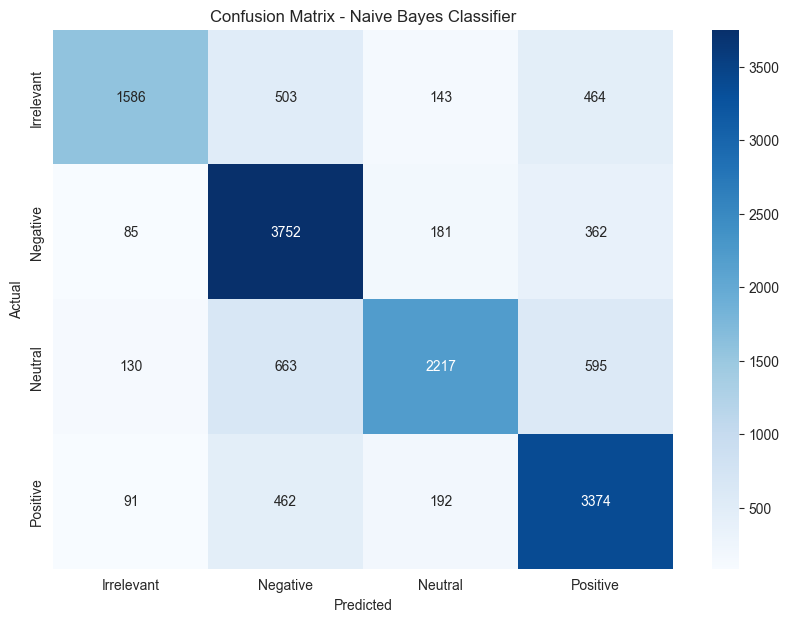

In [19]:
# Матриця невідповідностей
def plot_confusion_matrix(cm, name: str, labels:list):
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()

nb_confusion_matrix = confusion_matrix(test_data['Sentiment'], nb_predictions)
plot_confusion_matrix(nb_confusion_matrix, 'Naive Bayes Classifier', ['Irrelevant', 'Negative', 'Neutral', 'Positive'])

б) Аналіз настроїв з використанням лексикону TextBlob

In [20]:
test_data_blob = test_data[test_data['Sentiment'] != 'Irrelevant'].copy()

In [21]:
test_data_blob['Sentiment'].value_counts()

Sentiment
Negative    4380
Positive    4119
Neutral     3605
Name: count, dtype: int64

In [22]:
def analyze_sentiment(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    if polarity > 0:
        return "Positive"
    elif polarity < 0:
        return "Negative"
    else:
        return "Neutral"


test_data_blob['TextBlob_Sentiment'] = test_data_blob['Text'].apply(analyze_sentiment)

In [23]:
# Оцінка результатів
textblob_accuracy = accuracy_score(test_data_blob['Sentiment'], test_data_blob['TextBlob_Sentiment'])

print("\nАналіз настроїв з використанням лексикону TextBlob")
print("Точність моделі:", textblob_accuracy)


Аналіз настроїв з використанням лексикону TextBlob
Точність моделі: 0.4838070059484468


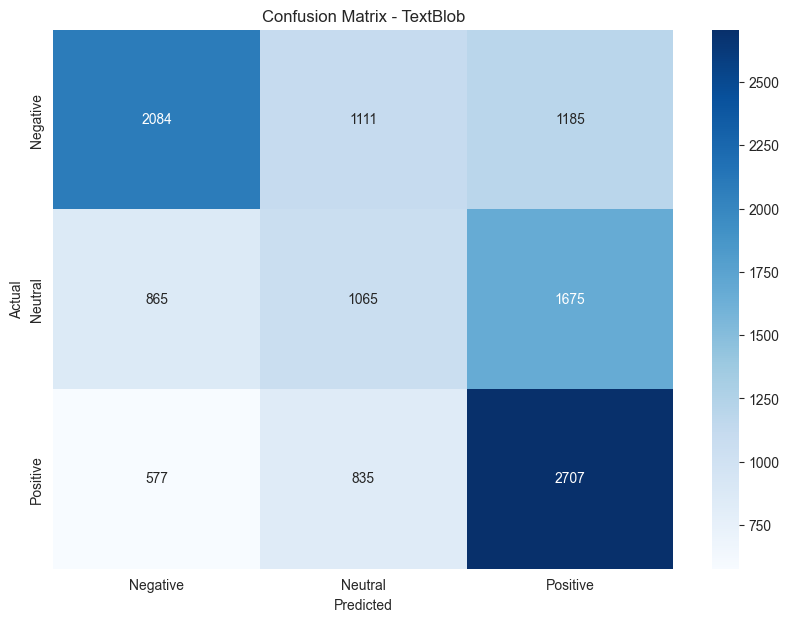

In [24]:
textblob_confusion_matrix = confusion_matrix(test_data_blob['Sentiment'], test_data_blob['TextBlob_Sentiment'])
plot_confusion_matrix(textblob_confusion_matrix, 'TextBlob', ['Negative', 'Neutral', 'Positive'])

в) Порівняння моделей

In [25]:
# Вибір трьох випадкових записів
random_samples = test_data_blob.sample(3)

for index, row in random_samples.iterrows():
    print("Запис №", index + 1)
    print("Текст:", row['Text'])
    print("Справжній настрій:", row['Sentiment'])
    print("Наївний байєсівський класифікатор:", nb_classifier.predict(vectorizer.transform([row['Text']]))[0])
    print("Лексикон TextBlob:", analyze_sentiment(row['Text']))
    print()

Запис № 20984
Текст:  warcraft can you explain this bullshit thanks pictwittercom  welcuknz
Справжній настрій: Negative
Наївний байєсівський класифікатор: Negative
Лексикон TextBlob: Positive

Запис № 38893
Текст: hearthstone duels firstplay thru  i am bad dont judge 'sr' song requests up drankin' dont feel alone twitchtvalphainnj
Справжній настрій: Neutral
Наївний байєсівський класифікатор: Neutral
Лексикон TextBlob: Negative

Запис № 30605
Текст: the sfl region is a playable league of legends simulationfl
Справжній настрій: Neutral
Наївний байєсівський класифікатор: Neutral
Лексикон TextBlob: Neutral



##### 2. Використання бібліотеки spaCy

In [26]:
import spacy

In [27]:
# Завантажуємо мовну модель
nlp = spacy.load("en_core_web_sm")

In [28]:
# Зчитуємо текст з файлу
with open('lab6-3.txt', 'r') as file:
    text = file.read()

text

'Gordon Brown has issued a rallying cry, telling supporters the "stakes are too high" to stay at home or protest vote in the forthcoming general election.  The chancellor said the vote - expected to fall on 5 May - will give a "clear and fundamental" choice between Labour investment and Conservative cuts. Speaking at Labour\'s spring conference in Gateshead, Mr Brown claimed the NHS was not safe in Conservative hands. He said Tory plans to cut Р’Р€35bn tax would "cut deep into public service".  To a packed audience at Gateshead\'s Sage Centre, the chancellor said the cuts proposed by shadow chancellor Oliver Letwin were the equivalent of sacking every teacher, GP and nurse in the country, he told activists. Laying into the Conservative\'s record in government he said: "I give you this promise - with Labour, Britain will never return to the mistakes of ERM and 10% inflation, 15% interest rates, Р’Р€3bn in lost reserves, 250,000 repossessed, one million in negative equity and three milli

In [29]:
# Обробляємо текст за допомогою spaCy
doc = nlp(text)

In [30]:
# а) Знайти та вивести стоп-слова, які присутні у тексті
stop_words = [token.text for token in doc if token.is_stop]
print("Stop words in the text:")
print(set(stop_words))


Stop words in the text:
{'as', 'by', 'third', 'never', 'It', 'three', 'for', 'you', 'will', 'back', 'was', 'with', 'take', 'more', "'s", 'into', 'within', 'is', 'would', 'one', 'part', 'next', 'again', 'too', 'he', 'but', 'and', 'give', 'I', 'our', 'or', 'in', 'be', 'which', 'had', 'this', 'now', 'of', 'from', 'five', 'are', 'on', 'a', 'between', 'every', 'just', 'also', 'He', 'am', 'an', 'has', 'at', 'The', 'In', 'not', 'May', 'the', 'after', 'say', 'their', 'Never', 'only', 'were', 'This', 'to', 'To'}


In [31]:
# б) Знайти та вивести всі іменники, які присутні у тексті
nouns = [token.text for token in doc if token.pos_ == "NOUN"]
print("\nNouns in the text:")
print(set(nouns))


Nouns in the text:
{'relief', 'maternity', 'minister', 'centres', 'supporters', 'nurse', 'cuts', 'years', 'flexibility', 'wage', 'e', 'spring', 'services', 'term', 'party', 'growth', 'network', 'attempt', 'creation', 'investment', 'stakes', 'record', 'minimum', 'world', '%', 'equity', 'country', 'schools', 'cry', 'ovation', 'government', 'unemployment', 'plans', 'choice', 'line', 'message', 'olds', 'home', 'public', 'employees', 'bust', 'election', '-', 'economy', 'activists', 'employers', 'part', 'conference', 'speech', 'service', 'inflation', 'telephone', 'dividing', 'promise', 'children', 'protest', 'queries', 'mistakes', 'text', 'answer', 'Р’Р€35bn', 'audience', 'teacher', 'year', 'power', 'mail', 'chancellor', 'rates', 'tax', 'session', 'stability', 'equivalent', 'platform', 'managers', 'leave', 'debt', 'vote', 'interest', 'reserves', 'campaign', 'hospitals', 'countries', 'boom', 'question', 'hands'}


In [32]:
# в) Знайти та вивести числа і організації, які присутні у тексті
numbers = [ent.text for ent in doc.ents if ent.label_ == "CARDINAL"]
organizations = [ent.text for ent in doc.ents if ent.label_ == "ORG"]
print("\nNumbers in the text:")
print(set(numbers))
print("\nOrganizations in the text:")
print(set(organizations))


Numbers in the text:
{'250,000', 'one million', '5', 'three million', '16'}

Organizations in the text:
{'NHS', 'GP', "Gateshead's Sage Centre", 'ERM', 'Conservative Party', 'Labour', 'Conservative'}
